In [2]:
from SetTopol import TopolSettings
import numpy as np
import random

In [3]:
top = TopolSettings(nx = 50, ny = 50, vol = 0.5, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)

In [5]:
# fixed on the left side + load on upper right downward
top.setf(value=1, node=51*50, teta=270)
top.setfixed(list_nodes=np.arange(0,51))
top.optimize(store=True)
top.plot()

it.: 1 , obj.: 122.849 Vol.: 0.500, ch.: 0.200
it.: 2 , obj.: 67.225 Vol.: 0.500, ch.: 0.200
it.: 3 , obj.: 44.583 Vol.: 0.500, ch.: 0.200
it.: 4 , obj.: 34.375 Vol.: 0.500, ch.: 0.200
it.: 5 , obj.: 29.718 Vol.: 0.500, ch.: 0.171
it.: 6 , obj.: 27.110 Vol.: 0.500, ch.: 0.137
it.: 7 , obj.: 25.887 Vol.: 0.500, ch.: 0.100
it.: 8 , obj.: 25.250 Vol.: 0.500, ch.: 0.073
it.: 9 , obj.: 24.872 Vol.: 0.500, ch.: 0.053
it.: 10 , obj.: 24.617 Vol.: 0.500, ch.: 0.049
it.: 11 , obj.: 24.430 Vol.: 0.500, ch.: 0.043
it.: 12 , obj.: 24.290 Vol.: 0.500, ch.: 0.035
it.: 13 , obj.: 24.186 Vol.: 0.500, ch.: 0.027
it.: 14 , obj.: 24.113 Vol.: 0.500, ch.: 0.019
it.: 15 , obj.: 24.062 Vol.: 0.500, ch.: 0.014
it.: 16 , obj.: 24.026 Vol.: 0.500, ch.: 0.011
it.: 17 , obj.: 24.001 Vol.: 0.500, ch.: 0.010
it.: 18 , obj.: 23.982 Vol.: 0.500, ch.: 0.008
it.: 19 , obj.: 23.968 Vol.: 0.500, ch.: 0.008
it.: 20 , obj.: 23.958 Vol.: 0.500, ch.: 0.007
it.: 21 , obj.: 23.949 Vol.: 0.500, ch.: 0.006
it.: 22 , obj.: 23.94

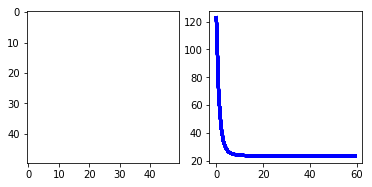

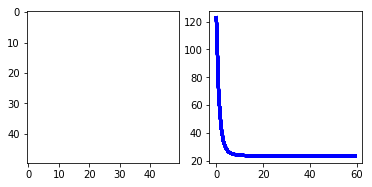

In [13]:
# fixed on the left side + load on bottom right downward
top.setf(value=1, node=51*51-1, teta=270)
top.setfixed(list_nodes=np.arange(0,51))
top.optimize(store=True)
top.plot()

it.: 1 , obj.: 168.767 Vol.: 0.500, ch.: 0.200
it.: 2 , obj.: 80.664 Vol.: 0.500, ch.: 0.200
it.: 3 , obj.: 48.506 Vol.: 0.500, ch.: 0.200
it.: 4 , obj.: 36.776 Vol.: 0.500, ch.: 0.200
it.: 5 , obj.: 33.039 Vol.: 0.500, ch.: 0.200
it.: 6 , obj.: 30.736 Vol.: 0.500, ch.: 0.189
it.: 7 , obj.: 29.655 Vol.: 0.500, ch.: 0.154
it.: 8 , obj.: 29.149 Vol.: 0.500, ch.: 0.106
it.: 9 , obj.: 28.878 Vol.: 0.500, ch.: 0.071
it.: 10 , obj.: 28.715 Vol.: 0.500, ch.: 0.048
it.: 11 , obj.: 28.607 Vol.: 0.500, ch.: 0.040
it.: 12 , obj.: 28.532 Vol.: 0.500, ch.: 0.035
it.: 13 , obj.: 28.477 Vol.: 0.500, ch.: 0.031
it.: 14 , obj.: 28.436 Vol.: 0.500, ch.: 0.027
it.: 15 , obj.: 28.403 Vol.: 0.500, ch.: 0.024
it.: 16 , obj.: 28.377 Vol.: 0.500, ch.: 0.022
it.: 17 , obj.: 28.355 Vol.: 0.500, ch.: 0.019
it.: 18 , obj.: 28.336 Vol.: 0.500, ch.: 0.017
it.: 19 , obj.: 28.320 Vol.: 0.500, ch.: 0.015
it.: 20 , obj.: 28.306 Vol.: 0.500, ch.: 0.014
it.: 21 , obj.: 28.294 Vol.: 0.500, ch.: 0.013
it.: 22 , obj.: 28.28

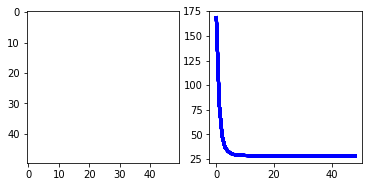

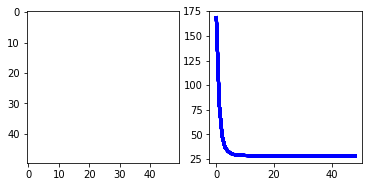

In [12]:
# fixed on the left side + load on bottom right with 45 degrees of inclination
top.setf(value=1, node=51*51-1, teta=45+180)
top.setfixed(list_nodes=np.arange(0,51))
top.optimize(store=True)
top.plot()

In [ ]:
# the plots are saved in the folder

### Generating the Dataset

#### Full Sides Fixed

In [27]:
top = TopolSettings(nx = 50, ny = 50, vol = 0.5, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
count = 0
for node in possible_fixed_nodes:
    for list_nodes in [np.arange(0,top.ny+1).tolist(), [m*(top.ny+1) for m in range(0,top.nx+1)], [m*(top.ny +1)-1 for m in range(1,top.nx+2)], np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1)).tolist()]:
        for teta in [180+90]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
            if node not in list_nodes: # i do not want to put load on a fixed edge
                count+=1
                top.setf(value=1, node=node, teta=teta)
                top.setfixed(list_nodes=list_nodes)
                top.optimize(store=True)
                top.plot()

596

#### Random Edge Fixed

##### Test

In [81]:
top = TopolSettings(nx = 3, ny = 3, vol = 0.5, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  

In [82]:
window = 3 # number of the fixed nodes 
# if we want to have different fixed nodes like corner fixed nodes etc. we will navigate the fixed edges in an anti-clockwise way
# for n fixed nodes (n=window), we have (top.ny +1 )*top.nx - window +1 navigations to be done to visit all the edges of the
# full area 
for i in range(0, (top.ny +1 )*top.nx - window +1):
    print(possible_fixed_nodes[i:i+window])

[0, 1, 2]
[1, 2, 3]
[2, 3, 7]
[3, 7, 11]
[7, 11, 15]
[11, 15, 14]
[15, 14, 13]
[14, 13, 12]
[13, 12, 8]
[12, 8, 4]


In [ ]:
window = 51
top = TopolSettings(nx = 50, ny = 50, vol = 0.3, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
top.setf(value=1, node=51*2+1, teta=180+90)
# list_fixed_nodes = possible_fixed_nodes[:25+window] # bottom left corner
list_fixed_nodes = possible_fixed_nodes[len(possible_fixed_nodes)-1 - (top.nx+1+window):len(possible_fixed_nodes)-1 - window] #  upper right corner
top.setfixed(list_nodes=list_fixed_nodes)
top.optimize(store=True)
top.plot()

In [103]:
len(possible_fixed_nodes[len(possible_fixed_nodes)-1 - (top.nx+1+window):len(possible_fixed_nodes)-1 - window])

51

In [98]:
possible_fixed_nodes[len(possible_fixed_nodes)-1]

2600

##### Generation of Data with Random Fixed Edges

In [133]:
window = 51
top = TopolSettings(nx = 50, ny = 50, vol = 0.5, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
count = 0
for node in random.sample(possible_fixed_nodes,10):
#     for i in range(0, (top.ny +1 )*top.nx - window +1): # 2500 possibilities i.e. too much
#     for i in random.sample(np.arange(0,(top.ny +1 )*top.nx - window +1).tolist(), 100)
    for i in range(0, (top.ny +1 )*top.nx - window +1, int(top.nx/2)):
        if i<len(possible_fixed_nodes):
            list_fixed_nodes = possible_fixed_nodes[i:i+window]
            for teta in [180+45]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
                if node not in list_fixed_nodes: # i do not want to put load on a fixed edge
                    count+=1
                    top.setf(value=1, node=node, teta=teta)
                    top.setfixed(list_nodes=list_fixed_nodes)
                    top.optimize(store=True)
                    top.plot()

In [134]:
count

72

## Multiple Loads
### Code Test

In [1]:
from SetTopol_multiple_loads import TopolSettings
import numpy as np
import random

In [2]:
# import torch
# torch.tensor([1,2,3])
# torch.from_numpy(np.arange(0,10))

In [3]:
# all left side fixed + 2 loads: one upward in the top-righ corner, one downward in the bottom-left corner 

top = TopolSettings(nx = 100, ny = 100, nbr_loads=2, vol = 0.4, rmin = 1.2, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)

# left side nodes fixed
list_fixed_nodes =  np.arange(0, top.ny+1).tolist()
top.fixed= np.arange(0, top.ny+1).tolist() #list_fixed_nodes

# loads: 
## top-right corner : top.nx*(top.ny+1) + upward => 90
## bottom-left corner : (top.nx+1)*(top.ny+1)-1 + downward => 180+90
top.setf(values=[1,1], nodes=[(top.nx+1)*(top.ny+1)-1, top.nx*(top.ny+1) ], tetas=[180+90, 90])

# Run Optimization
top.optimize_with_DL_constraint(maxiter=100)

# Plot Resulting 2D design
# top.plot()

C:\Users\walmasri\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\modules\loss.py:88: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([1, 1, 100, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss: 0.39839258790016174
loss: 0.39962509274482727
it.: 1 , obj.: 526.360 Vol.: 0.400, ch.: 0.200


C:\Users\walmasri\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\modules\loss.py:88: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([1, 1, 100, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss: 0.22221235930919647
loss: 0.22208422422409058
it.: 2 , obj.: 291.222 Vol.: 0.400, ch.: 0.200


C:\Users\walmasri\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\modules\loss.py:88: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([1, 1, 100, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


loss: 0.16077271103858948
loss: 0.16061115264892578
it.: 3 , obj.: 213.917 Vol.: 0.400, ch.: 0.200
loss: 0.16261442005634308
loss: 0.16243842244148254
it.: 4 , obj.: 174.666 Vol.: 0.400, ch.: 0.200
loss: 0.11547272652387619
loss: 0.11510931700468063
it.: 5 , obj.: 147.346 Vol.: 0.400, ch.: 0.200
loss: 0.07315696030855179
loss: 0.0728522539138794
it.: 6 , obj.: 115.566 Vol.: 0.400, ch.: 0.200
loss: 0.04442615807056427
loss: 0.04431841894984245
it.: 7 , obj.: 89.064 Vol.: 0.400, ch.: 0.200
loss: 0.05738215893507004
loss: 0.057742536067962646
it.: 8 , obj.: 74.352 Vol.: 0.400, ch.: 0.200
loss: 0.03550529479980469
loss: 0.03600116819143295
it.: 9 , obj.: 68.544 Vol.: 0.400, ch.: 0.200
loss: 0.021972157061100006
loss: 0.022556114941835403
it.: 10 , obj.: 65.926 Vol.: 0.400, ch.: 0.200
loss: 0.016641288995742798
loss: 0.017311137169599533
it.: 11 , obj.: 64.547 Vol.: 0.400, ch.: 0.200
loss: 0.014351902529597282
loss: 0.015076788142323494
it.: 12 , obj.: 63.767 Vol.: 0.400, ch.: 0.200
loss: 0

loss: 0.012373385950922966
loss: 0.012485602870583534
it.: 85 , obj.: 61.118 Vol.: 0.400, ch.: 0.035
loss: 0.012429689057171345
loss: 0.012545553967356682
it.: 86 , obj.: 61.118 Vol.: 0.400, ch.: 0.027
loss: 0.012486955150961876
loss: 0.012606844305992126
it.: 87 , obj.: 61.118 Vol.: 0.400, ch.: 0.020
loss: 0.012556981295347214
loss: 0.012679444625973701
it.: 88 , obj.: 61.119 Vol.: 0.400, ch.: 0.073
loss: 0.01262983400374651
loss: 0.012753423303365707
it.: 89 , obj.: 61.121 Vol.: 0.400, ch.: 0.107
loss: 0.012703455053269863
loss: 0.012825851328670979
it.: 90 , obj.: 61.123 Vol.: 0.400, ch.: 0.101
loss: 0.012780951336026192
loss: 0.012897900305688381
it.: 91 , obj.: 61.125 Vol.: 0.400, ch.: 0.088
loss: 0.012862954288721085
loss: 0.01297296304255724
it.: 92 , obj.: 61.127 Vol.: 0.400, ch.: 0.079
loss: 0.012947660870850086
loss: 0.013051556423306465
it.: 93 , obj.: 61.127 Vol.: 0.400, ch.: 0.069
loss: 0.013033293187618256
loss: 0.01313017774373293
it.: 94 , obj.: 61.127 Vol.: 0.400, ch.:

AttributeError: 'compliance_predictor' object has no attribute 'module'

In [5]:
import torch
torch.save(top.Compliance_predictor.state_dict(), './compliance_predictor/element_wise_compliance_predictor_on_cpu_test.ckpt')

In [4]:
top.plot_design_evolution(name="test_plot_31_01_2021")

No stored data, please re run topology optimization with store=True


UnboundLocalError: local variable 'fig' referenced before assignment

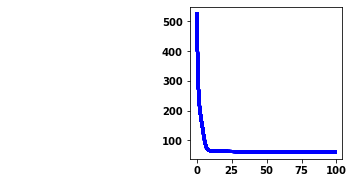

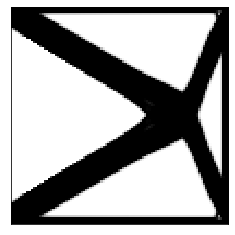

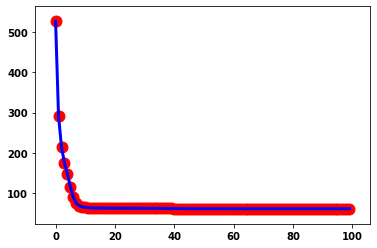

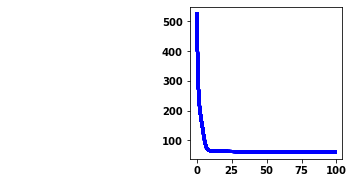

In [4]:
top.plot_design_evolution(name="test_plot_31_01_2021")

In [13]:
sum(top.hist[len(top.hist)-1].reshape(top.nx,top.ny).T[:,0])
# (1.-top.hist[len(top.hist)-1].reshape(self.nx,self.ny).T)*255

20.57447524828197

#### Generating dataset with multiple Loads

In [10]:
window = 100/#51
top = TopolSettings(nx = 3, ny = 3,nbr_loads=2, vol = 0.4, rmin = 1.3, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
count = 0
for node in random.sample(possible_fixed_nodes,10):
    nodes = [node, node+1]
#     for i in range(0, (top.ny +1 )*top.nx - window +1): # 2500 possibilities i.e. too much
#     for i in random.sample(np.arange(0,(top.ny +1 )*top.nx - window +1).tolist(), 100)
    for i in range(0, (top.ny +1 )*top.nx - window +1, int(top.nx/4)):
        print(i)
        if i<len(possible_fixed_nodes):
            print("hello:", str(i))
#             list_fixed_nodes = possible_fixed_nodes[i:i+window]
#             for teta in [90]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
#                 if len(set(nodes) - set(list_fixed_nodes)) == len(set(nodes)): # i do not want to put load on a fixed edge
#                     count+=1
#                     print(list_fixed_nodes)
#                     print(nodes)
#                     top.setf(values=[1,1], nodes=nodes, tetas=[180+teta, 180+teta])
#                     top.setfixed(list_nodes=list_fixed_nodes)
#                     top.optimize(store=True)
#                     top.plot()

0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0
1
hello: 1
2
hello: 2
3
hello: 3
4
hello: 4
5
hello: 5
6
hello: 6
7
hello: 7
8
hello: 8
9
hello: 9
0
hello: 0

In [14]:
int(window/2)
opposite_side_nodes[-1]

11

In [36]:
window = int(100/2)#51
count = 0
for volfraction in [0.3, 0.5, 0.6]:
    for rmin in [ 2.7, 3.5, 4.3]:
        for filt in [0,1]:
            top = TopolSettings(nx = 100, ny = 100,nbr_loads=1, vol = volfraction, rmin = rmin, penalinit = 3.0, penalmed = 3.0, filt = filt, nu=0.3)
            possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  

            for i in range(0, (top.ny +1 )*top.nx - window +1, int(top.nx/4)):#
                # fixed nodes
                fixed_nodes = possible_fixed_nodes[i:i+window]
                if len(fixed_nodes)>0:
                    # opposite side nodes (load nodes)
                    element = fixed_nodes[(len(fixed_nodes) - 1 )]
                    starting_index = (possible_fixed_nodes.index(element)+top.nx)%len(possible_fixed_nodes)
                    ending_index = (possible_fixed_nodes.index(element)+2*top.nx)%len(possible_fixed_nodes)+1
                    opposite_side_nodes = []
                    if ending_index<starting_index:
                        opposite_side_nodes = possible_fixed_nodes[starting_index: ] + possible_fixed_nodes[0:ending_index]
                    else:
                        opposite_side_nodes = possible_fixed_nodes[starting_index: ending_index]

                    for load_node in [opposite_side_nodes[0],opposite_side_nodes[window],opposite_side_nodes[-1] ]:
                        for teta in [0,45,90,180,180+45,180+90]:
                            count+=1
print(count)

5184


In [27]:
len(possible_fixed_nodes)

400

In [201]:
window = 51
top = TopolSettings(nx = 50, ny = 50, nbr_loads=2, vol = 0.4, rmin = 1.3, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
count = 0

for i in range(0, (top.ny +1 )*top.nx - window +1, int(top.nx/2)):
    if i<len(possible_fixed_nodes):
        list_fixed_nodes = possible_fixed_nodes[i:i+window]
        element = list_fixed_nodes[(len(list_fixed_nodes) - 1 )] # the last fixed node
        node = possible_fixed_nodes[(possible_fixed_nodes.index(element)+window)%len(possible_fixed_nodes)] # put load on edge nodes "window" away from the fixed nodes i.e. the distance (nbr of nodes) beween the last fixed node and the node where we put the charge is = window
#         node = (list_fixed_nodes[len(list_fixed_nodes) - 1] + int(top.nx/2))%top.ndof
        node2 = possible_fixed_nodes[(possible_fixed_nodes.index(element)+2*window)%len(possible_fixed_nodes)]
        nodes = [node, node2]
        for teta in [0,45,90]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
            if len(set(nodes) - set(list_fixed_nodes)) == len(set(nodes)): # i do not want to put load on a fixed edge
                count+=1
                top.setf(values=[1,1], nodes=nodes, tetas=[teta, 180+teta])
                top.setfixed(list_nodes=list_fixed_nodes)
                top.optimize(store=True)
                top.plot()

In [203]:
count2

24

In [226]:
possible_fixed_nodes

[0, 1, 2, 3, 7, 11, 15, 14, 13, 12, 8, 4]

In [231]:
# here we fix a side and we set 2 corner loads on the opposite side

top = TopolSettings(nx = 50, ny = 50, nbr_loads=2, vol = 0.4, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
count = 0
for list_fixed_nodes in [np.arange(0, top.ny+1).tolist(), [m*(top.ny +1)-1 for m in range(1,top.nx+2)] , np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] , np.sort(np.asarray([m*(top.ny+1) for m in range(0,top.nx+1)])).tolist()[::-1]  ]:
    element = list_fixed_nodes[(len(list_fixed_nodes) - 1 )]
    node = possible_fixed_nodes[(possible_fixed_nodes.index(element)+top.nx)%len(possible_fixed_nodes)]
    node2 = possible_fixed_nodes[(possible_fixed_nodes.index(element)+2*top.nx)%len(possible_fixed_nodes)]
    nodes = [node, node2]
#     print(list_fixed_nodes)
#     print(element)
#     print(node)
#     print(node2)
    for teta in [0, 45, 90,180, 180+45,180+90]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
        count+=1
        top.setf(values=[1,1], nodes=nodes, tetas=[teta, teta+180])# or with [teta, teta]
        top.setfixed(list_nodes=list_fixed_nodes)
        top.optimize(store=True)
        top.plot()

[0, 1, 2, 3]
15
12
[3, 7, 11, 15]
12
0
[15, 14, 13, 12]
0
3
[12, 8, 4, 0]
3
15


In [222]:
count

24

In [ ]:
# all left side fixed + 3 loads: one upward in the top-righ corner, one downward in the bottom-left corner , one horizontal in the middle of the right side

top = TopolSettings(nx = 50, ny = 50, nbr_loads=3, vol = 0.4, rmin = 1.2, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)

# left side nodes fixed
list_fixed_nodes =  np.arange(0, top.ny+1).tolist()
top.setfixed(list_nodes=list_fixed_nodes)

# loads: 
## top-right corner :  top.nx*(top.ny+1) + upward => 90
## bottom-left corner : (top.nx+1)*(top.ny+1)-1 + downward => 180+90
## middle-right    : (top.nx+1)*(top.ny+1)-1 + int(top.ny/2) + horizontal => 0
top.setf(values=[0.5,0.5,1], nodes=[(top.nx+1)*(top.ny+1)-1, top.nx*(top.ny+1), (top.nx+1)*(top.ny+1)-1 + int(top.ny/2) ], tetas=[180+90, 90, 0])

# Run Optimization
top.optimize(store=True)

# Plot Resulting 2D design
top.plot()

In [242]:
# here we fix a sliding side and we set 3 loads on the opposite side

top = TopolSettings(nx = 50, ny = 50, nbr_loads=3, vol = 0.4, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
window = top.nx+1

possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
count = 0
for i in range(0, (top.ny +1 )*top.nx - window +1, int(top.nx/2)):
    if i<len(possible_fixed_nodes):
        list_fixed_nodes = possible_fixed_nodes[i:i+window]
        element = list_fixed_nodes[(len(list_fixed_nodes) - 1 )]
        node = possible_fixed_nodes[(possible_fixed_nodes.index(element)+top.nx)%len(possible_fixed_nodes)]
        node2 = possible_fixed_nodes[(possible_fixed_nodes.index(element)+2*top.nx)%len(possible_fixed_nodes)]
        node3 = possible_fixed_nodes[(possible_fixed_nodes.index(element)+int(1.5*top.nx))%len(possible_fixed_nodes)]
        nodes = [node, node2, node3]
#         print(list_fixed_nodes)
#         print(element)
#         print(node)
#         print(node2)
#         print(node3)
        for teta in [0, 45, 90,180, 180+45,180+90]: # [45,90,180,180+45,180+90] with teta = 180+90 only we have 596 output_plot
            count+=1
            top.setf(values=[1,1,1], nodes=nodes, tetas=[0, teta, teta+180])# or with [teta, teta]
            top.setfixed(list_nodes=list_fixed_nodes)
            top.optimize(store=True)
            top.plot()

In [243]:
count

48

In [4]:
top = TopolSettings(nx = 3, ny = 3, nbr_loads=3, vol = 0.4, rmin = 5.4, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
possible_fixed_nodes = np.arange(0, top.ny+1).tolist()+ [m*(top.ny +1)-1 for m in range(2,top.nx+1)] + np.sort(np.arange((top.ny+1)*top.nx, (top.nx+1)*(top.ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(top.ny+1) for m in range(1,top.nx)])).tolist()[::-1]  
possible_fixed_nodes

[0, 1, 2, 3, 7, 11, 15, 14, 13, 12, 8, 4]

In [8]:
top.load_nodes

[0, 0, 0]

In [9]:
print(1,2)

1 2


In [274]:
list_fixed_nodes = [m*(top.ny +1)-1 for m in range(1,top.nx+2)] #np.arange(0, top.ny+1).tolist()
print(list_fixed_nodes)
element = list_fixed_nodes[(len(list_fixed_nodes) - 1 )]
starting_index = (possible_fixed_nodes.index(element)+top.nx)%len(possible_fixed_nodes)
ending_index = (possible_fixed_nodes.index(element)+2*top.nx)%len(possible_fixed_nodes)+1
opposite_side_nodes = []
if ending_index<starting_index:
    opposite_side_nodes = possible_fixed_nodes[starting_index: ] + possible_fixed_nodes[0:ending_index]
opposite_side_nodes

[3, 7, 11, 15]


[12, 8, 4, 0]

In [272]:
(possible_fixed_nodes.index(element)+2*top.nx)%len(possible_fixed_nodes)+1

1

In [270]:
element
(possible_fixed_nodes.index(element)+top.nx +top.ny)%len(possible_fixed_nodes)+1

1

In [269]:
possible_fixed_nodes[(possible_fixed_nodes.index(element)+top.nx)%len(possible_fixed_nodes)]

12

In [258]:
possible_fixed_nodes

[0, 1, 2, 3, 7, 11, 15, 14, 13, 12, 8, 4]

In [257]:
possible_fixed_nodes[possible_fixed_nodes.index(end_node), possible_fixed_nodes.index(starting_node)]

TypeError: list indices must be integers or slices, not tuple

In [4]:
import datetime
len(str(datetime.datetime.now()))

26

In [7]:
str(datetime.datetime.now())[0:19]

'2020-01-16 19_22_17'

In [1]:
from data_generator import one_load_design_generator

initial list of fixe nodes: []
Generating Designs ... 
before setting f, list of fixed nodes: [0, 1, 2, 3]
list of fixed nodes are:  [0, 1, 2, 3]
it.: 1 , obj.: 137.569 Vol.: 0.400, ch.: 0.193
it.: 2 , obj.: 106.458 Vol.: 0.400, ch.: 0.095
it.: 3 , obj.: 100.693 Vol.: 0.400, ch.: 0.073
it.: 4 , obj.: 96.117 Vol.: 0.400, ch.: 0.045
it.: 5 , obj.: 93.860 Vol.: 0.400, ch.: 0.040
it.: 6 , obj.: 92.052 Vol.: 0.400, ch.: 0.027
it.: 7 , obj.: 91.034 Vol.: 0.400, ch.: 0.025
it.: 8 , obj.: 90.282 Vol.: 0.400, ch.: 0.018
it.: 9 , obj.: 89.832 Vol.: 0.400, ch.: 0.016
it.: 10 , obj.: 89.511 Vol.: 0.400, ch.: 0.012
it.: 11 , obj.: 89.312 Vol.: 0.400, ch.: 0.010
it.: 12 , obj.: 89.171 Vol.: 0.400, ch.: 0.008
it.: 13 , obj.: 89.082 Vol.: 0.400, ch.: 0.007
it.: 14 , obj.: 89.018 Vol.: 0.400, ch.: 0.005
it.: 15 , obj.: 88.978 Vol.: 0.400, ch.: 0.004
it.: 16 , obj.: 88.949 Vol.: 0.400, ch.: 0.003
it.: 17 , obj.: 88.930 Vol.: 0.400, ch.: 0.003
it.: 18 , obj.: 88.917 Vol.: 0.400, ch.: 0.002
it.: 19 , obj.

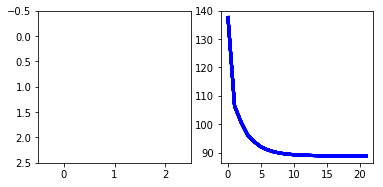

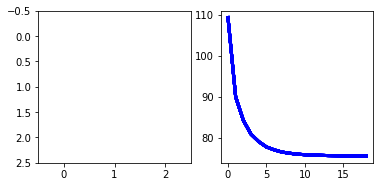

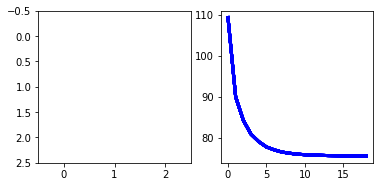

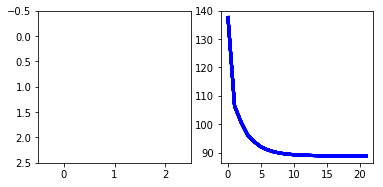

In [2]:
two_load_design_generator(nx = 100, ny = 100, volfraction = 0.4, nbr_loads = 2, rmin = 1.2, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3 )

In [ ]:
from data_generator import one_load_design_generator_v2


In [38]:
from firebase_admin import db

In [6]:
from SetTopol_multiple_loads import TopolSettings
import numpy as np
import random
from multiprocessing import Pool
import pandas as pd
import datetime
import os
print(os.cpu_count())

4


In [ ]:
from SetTopol_multiple_loads import TopolSettings
import numpy as np
import random
from multiprocessing import Pool
import pandas as pd
import datetime
import os
print(os.cpu_count())


def one_load_generate_design(params):
    print("inside f")

    list_nx   = []
    list_ny    = []
    list_vol   = []
    list_rmin  = [] 
    list_penalinit = []
    list_penalmed  = [] 
    list_filt  = [] 
    list_nu    = [] 
    list_ndof = [] 
    list_Emin = [] 
    list_Emax = [] 
    list_f = [] 
    list_node_f = [] 
    list_teta_f = [] 
    list_valuef = [] 
    list_fixed_nodes = []
    list_type_fixed_nodes = []
    list_final_objective_function_value = []
    list_all_objective_function_values = []
    list_design_references = []
    
    count = 0
    top = TopolSettings(nx = params['nx'], ny = params['ny'], nbr_loads = 1, vol = params['volfraction'], rmin = params['rmin'], penalinit = 3.0, penalmed = 3.0, filt = params['filt'], nu = 0.3)
    fixed_nodes = params['fixed_nodes']
    if len(fixed_nodes)>0:
        # opposite side nodes (load nodes)
        element = fixed_nodes[(len(fixed_nodes) - 1 )]
        starting_index = (possible_fixed_nodes.index(element)+top.nx)%len(possible_fixed_nodes)
        ending_index = (possible_fixed_nodes.index(element)+2*top.nx)%len(possible_fixed_nodes)+1
        opposite_side_nodes = []
        if ending_index<starting_index:
            opposite_side_nodes = possible_fixed_nodes[starting_index: ] + possible_fixed_nodes[0:ending_index]
        else:
            opposite_side_nodes = possible_fixed_nodes[starting_index: ending_index]

        for load_node in [opposite_side_nodes[0],opposite_side_nodes[window],opposite_side_nodes[-1] ]:
            nodes = [load_node]
            if (len(set(nodes) - set(fixed_nodes)) == len(set(nodes))) : # i do not want to put load on a fixed edge    
                top.setf(values=[1], nodes=nodes, tetas=[params['teta']])
                top.fixed = fixed_nodes
#                 top.optimize(store=True)
                # Plot and Save only and only if the OBJECTIVE FUNCTION VALUE decreased i.e. the optimization problem converged
                if (top.comphist[0]> top.comphist[-1]): #(top.comphist[0]/ top.comphist[-1] >= 5):
                    datetime_info = str(datetime.datetime.now())[0:19].replace(':', '_')
                    
                    top.plot(name =  datetime_info+'_'+str(count+1))
                    list_nx.append(top.nx)
                    list_ny.append(top.ny)
                    list_vol.append(top.vol)
                    list_rmin.append(top.rmin) 
                    list_penalinit.append(top.penalinit) 
                    list_penalmed.append(top.penalmed) 
                    list_filt.append(top.filt) 
                    list_nu.append(top.nu) 
                    list_ndof.append(top.ndof) 
                    list_Emin.append(top.Emin) 
                    list_Emax.append(top.Emax) 
                    list_node_f.append(top.load_nodes) 
                    list_teta_f.append(top.tetas) 
                    list_valuef.append(top.valuefs) 
                    list_fixed_nodes.append(top.list_fixed_nodes)
                    list_type_fixed_nodes.append(top.fixed_part)
                    list_final_objective_function_value.append(top.comphist[-1])
                    list_all_objective_function_values.append(top.comphist)
                    list_design_references.append(datetime_info+'_'+str(count+1))
                    count +=1
                    print("name:",datetime_info+'_'+str(count+1))
                    
        return pd.DataFrame(data = {'nx':list_nx, 'ny':list_ny, 'volume_fraction':list_vol, 'filter_rmin': list_rmin, 
                                        'initial_penalty':list_penalinit, 'med_penalty': list_penalmed, 
                                        'mesh_independency_filter':list_filt,'poisson_ratio_nu':list_nu, 
                                        'number_of_nodes':list_ndof, 'Young_modulus_Emin':list_Emin, 
                                        'Young_modulus_Emax':list_Emax, 'load_nodes':list_node_f, 
                                        'load_orientations':list_teta_f, 'load_intensities':list_valuef,
                                        'fixed_nodes':list_fixed_nodes, 'type_fixed_nodes':list_type_fixed_nodes, 
                                        'final_objective_function_value':list_final_objective_function_value, 
                                        'all_objective_function_values':list_all_objective_function_values, 
                                        'design_reference':list_design_references})
                    

df = pd.DataFrame(data = {'nx':[], 'ny':[], 'volume_fraction':[], 'filter_rmin': [], 'initial_penalty':[], 'med_penalty': [], 
                          'mesh_independency_filter':[], 'poisson_ratio_nu':[], 'number_of_nodes':[], 'Young_modulus_Emin':[],
                          'Young_modulus_Emax':[], 'load_nodes':[], 'load_orientations':[], 'load_intensities':[],
                          'fixed_nodes':[], 'type_fixed_nodes':[], 'final_objective_function_value':[], 
                          'all_objective_function_values':[], 'design_reference':[]})
 
volfractions = [0.3]
rmins = [1.2]
filters = [0]
tetas = [0,45]
nx = 3
ny = 3
window = int(nx/2)
possible_fixed_nodes = np.arange(0, ny+1).tolist()+ [m*(ny +1)-1 for m in range(2,nx+1)] + np.sort(np.arange((ny+1)*nx, (nx+1)*(ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(ny+1) for m in range(1,nx)])).tolist()[::-1]  
pool = Pool(processes = os.cpu_count()-2) 
result_df = pool.map(one_load_generate_design, [{'nx':nx, 'ny':ny, 'volfraction':volfraction, 'rmin':rmin, 'filt':filt, 'fixed_nodes':possible_fixed_nodes[i:i+window], 'teta':teta} for volfraction in volfractions for rmin in rmins for filt in filters for i in  range(0, (ny +1 )*nx - window +1, int(nx/2)) for teta in tetas])

if len(result_df)>0:
    df.append(result_df, ignore_index = True) 

df.to_csv('./parameters/test_one_load_design_generation_'+str(datetime.datetime.now())[0:19].replace(':', '_')+'.csv')

4


In [45]:
volfractions = [0.3, 0.5, 0.6]
rmins = [1.2,2.7,3.5,4.3]
filters = [0,1]
tetas = [0,45,90,180,180+45,180+90]
nx = 3
ny = 3
window = int(nx/2)
len([{'nx':nx, 'ny':ny, 'volfraction':volfraction, 'rmin':rmin, 'filt':filt, 'fixed_nodes':possible_fixed_nodes[i:i+window], 'teta':teta} for volfraction in volfractions for rmin in rmins for filt in filters for i in range(0, (ny +1 )*nx - window +1, int(nx/2)) for teta in tetas])

1728

In [4]:
import datetime
str(datetime.datetime.now())[0:21].replace(':', '_').replace('.','_')

'2020-01-20 15_28_28_3'

In [7]:
volfractions = [0.3]
rmins = [1.2]
filters = [0]
tetas = [0,45]
nx = 3
ny = 3
window = int(nx/2)
possible_fixed_nodes = np.arange(0, ny+1).tolist()+ [m*(ny +1)-1 for m in range(2,nx+1)] + np.sort(np.arange((ny+1)*nx, (nx+1)*(ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(ny+1) for m in range(1,nx)])).tolist()[::-1]  

sum([1 for volfraction in volfractions for rmin in rmins for filt in filters for i in  range(0, (ny +1 )*nx - window +1, int(nx/2)) for teta in tetas])

24

In [57]:
norm.ppf(0.95, loc =0, scale = 1)

1.6448536269514722

In [104]:
Latin-hypercube designs can be created using the following simple syntax:
lhs(n, [samples, criterion, iterations])
where
n: an integer that designates the number of factors (required) i.e. n=1 => every sample is a one element list, n=2 => every sample is a 2 elements list , etc.
samples: an integer that designates the number of sample points to generate for each factor (default: n)
criterion: a string that tells lhs how to sample the points (default: None, which simply randomizes the points within the intervals):
“center” or “c”: center the points within the sampling intervals
“maximin” or “m”: maximize the minimum distance between points, but place the point in a randomized location within its interval
“centermaximin” or “cm”: same as “maximin”, but centered within the intervals
“correlation” or “corr”: minimize the maximum correlation coefficient

In [48]:
from scipy.stats.distributions import norm, uniform, bernoulli, poisson, binom
from pyDOE import *
volume_fraction = norm(loc=0.3, scale=0.1).ppf(lhs(50, samples=1)).reshape(50,)  # this gives the x values having y-values equal to volume_fraction

In [152]:
rmin = uniform(1.1, 6).ppf(lhs(50, samples=1)).reshape(50,)  # this gives the x values having y-values equal to volume_fraction

In [168]:
filt = bernoulli(0.5).ppf(lhs(50, samples=1)).reshape(50,)
sum(filt)

27.0

In [154]:
teta = uniform(0, 359).ppf(lhs(50, samples=1)).reshape(50,)  # this gives the x values having y-values equal to volume_fraction

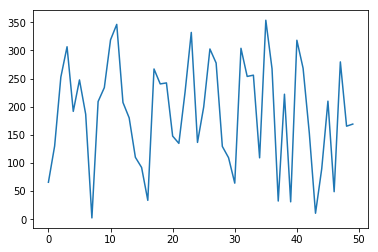

In [171]:
plt.plot(np.arange(len(teta)), teta)

In [189]:
nbr_loads = poisson(50).ppf(lhs(50, samples=1)).reshape(50,)

In [84]:
possible_fixed_nodes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 21,
 32,
 43,
 54,
 65,
 76,
 87,
 98,
 109,
 120,
 119,
 118,
 117,
 116,
 115,
 114,
 113,
 112,
 111,
 110,
 99,
 88,
 77,
 66,
 55,
 44,
 33,
 22,
 11]

In [83]:
nx = 10
ny = 10
possible_fixed_nodes = np.arange(0, ny+1).tolist()+ [m*(ny +1)-1 for m in range(2,nx+1)] + np.sort(np.arange((ny+1)*nx, (nx+1)*(ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(ny+1) for m in range(1,nx)])).tolist()[::-1]  

window = 2
np.arange(0, len(possible_fixed_nodes), int(nx/2))

array([ 0,  5, 10, 15, 20, 25, 30, 35])

In [72]:
norm(50,30).ppf(lhs(50, samples=1)).reshape(50,)

array([ 61.18143889,  44.68089761,  82.59657885,  73.06282903,
        54.30989965, -17.24880615,  59.31587077,  53.900857  ,
        35.52970497,  56.69617678,  43.34910443,  69.16690853,
       -13.93083716,  21.53715713,  59.28599564,  36.11438955,
        61.51956771, 100.58583727,  33.29007376,  83.37553503,
       -30.53731304,  34.10311533,  35.88301791,  22.33644874,
        19.10886945,  25.87876195,  -7.36319741,   8.27418026,
        86.83402535,  36.38815936,  22.75590836,  84.71046137,
        80.83410518,  66.57254125,  96.23550373,  -8.58159184,
        61.31781197,  35.74549155,  -0.4739877 ,  53.54448966,
         4.03757275,  50.22000103,  47.05809602,  21.05877781,
       106.84343471,  29.66710144,  46.87879555,  84.57605548,
        92.22012228,  55.66335303])

In [96]:
import random
rmins_1 = uniform(1.1, 3).ppf(lhs(50, samples=1)).reshape(50,) #  0.1 < volume fraction < 0.4 => 1.1 < Rmin < 3 ; Rmin suit la loi uniforme (1.1, 3 )
rmins_2 = uniform(2, 3).ppf(lhs(50, samples=1)).reshape(50,) #  0.4 < volume fraction < 0.6 => 2 < Rmin < 3 ; Rmin suit la loi uniforme (2, 3 )
rmins_3 = uniform(3, 4).ppf(lhs(50, samples=1)).reshape(50,) 
volfraction = 0.7
random.choice(rmins_1) if volfraction<0.4  else  random.choice(rmins_3)

4.290393488036574

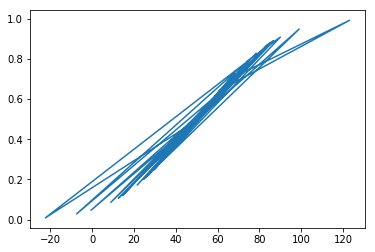

In [69]:
import matplotlib.pyplot as plt
plt.plot(x.tolist(),y.reshape(50,).tolist())

C:\Users\walmasri\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


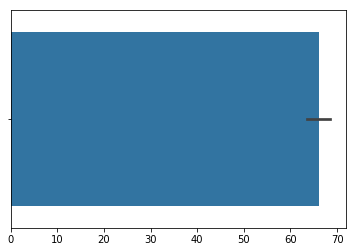

In [54]:
import seaborn as sns
sns.countplot(nbr_loads)

In [208]:
volfractions = norm(loc=0.3, scale=0.1).ppf(lhs(50, samples=1)).reshape(50,)  # this gives the x values having y-values equal to volume_fraction
rmins = uniform(1.1, 6).ppf(lhs(50, samples=1)).reshape(50,) # rmin lower
filters = bernoulli(0.5).ppf(lhs(50, samples=1)).reshape(50,) # either present (1) or absent (0)
tetas = uniform(0, 359).ppf(lhs(50, samples=1)).reshape(50,)
nbr_loads = poisson(2).ppf(lhs(50, samples=1)).reshape(50,) # most probable nbr_loads is 2

nx = 100
ny = 100
window = int(nx/2)
possible_fixed_nodes = np.arange(0, ny+1).tolist()+ [m*(ny +1)-1 for m in range(2,nx+1)] + np.sort(np.arange((ny+1)*nx, (nx+1)*(ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(ny+1) for m in range(1,nx)])).tolist()[::-1]  

total_nbr_samples = 10
params_list = []
for cnt in range((total_nbr_samples)):
    volfraction = random.choice(volfractions)
    rmin = random.choice(rmins)
    filt = random.choice(filters)
    the_nbr_loads = random.choice(nbr_loads)
    teta = random.sample(tetas.tolist(), int(the_nbr_loads))
#     for i in  range(0, (ny +1 )*nx - window +1, int(nx/2)):
    params_list.append( {'nx':nx, 'ny':ny, 'volfraction':volfraction, 'rmin':rmin, 'filt':filt, 'nbr_loads':the_nbr_loads, 'teta':teta, 'window': window} )


In [209]:
len(params_list)

10

In [210]:
(params_list)

[{'nx': 100,
  'ny': 100,
  'volfraction': 0.09236602107038935,
  'rmin': 6.845600671447828,
  'filt': 1.0,
  'nbr_loads': 3.0,
  'teta': [262.32261399415717, 323.5367983535159, 133.64011665028352],
  'window': 50},
 {'nx': 100,
  'ny': 100,
  'volfraction': 0.31776779669536037,
  'rmin': 4.695351101132511,
  'filt': 0.0,
  'nbr_loads': 2.0,
  'teta': [107.35306751645678, 323.211253828342],
  'window': 50},
 {'nx': 100,
  'ny': 100,
  'volfraction': 0.193798424833599,
  'rmin': 7.015067054480147,
  'filt': 1.0,
  'nbr_loads': 1.0,
  'teta': [323.211253828342],
  'window': 50},
 {'nx': 100,
  'ny': 100,
  'volfraction': 0.28088681421676975,
  'rmin': 2.1232638480850983,
  'filt': 0.0,
  'nbr_loads': 1.0,
  'teta': [344.6299318976133],
  'window': 50},
 {'nx': 100,
  'ny': 100,
  'volfraction': 0.298781079669805,
  'rmin': 2.762828445359554,
  'filt': 1.0,
  'nbr_loads': 3.0,
  'teta': [219.08775158509818, 60.580608304996204, 69.6084793049712],
  'window': 50},
 {'nx': 100,
  'ny': 100,


In [43]:
import numba
from numba import float32, float64, int16

In [39]:
# numba.float64[:]
# np.array(dtype='f')
np.empty(1)

array([1.])

In [46]:
struct_dtype = np.dtype([('nx', np.int16), ('ny', np.int16), ('volume_fraction', np.float64),
                        ('filter_rmin',np.float64), ('initial_penalty',np.float64),
                        ('med_penalty',np.float64), ('mesh_independency_filter', np.int16),
                        ('poisson_ratio_nu', np.float32), ('number_of_nodes', np.int16),
                        ('Young_modulus_Emin', np.float32), ('Young_modulus_Emax', np.float32),
                         
                        ('load_nodes',int16[:]), ('load_orientations', float64[:]),
#                         ('load_intensities',numba.float64[:]), ('fixed_nodes',numba.int16[:]),
#                         ('final_objective_function_value', np.float64), 
#                          ('all_objective_function_values',numba.float64[:]),
#                          ('design_reference',np.int16 )
                        ])

TypeError: data type not understood

In [25]:
ty = numba.from_dtype(struct_dtype)

In [26]:
ty

Record([('row', '<f8'), ('col', '<f8')])

In [27]:
import re
re.sub(' +', '', 'The     quick brown    fox')

'Thequickbrownfox'

In [3]:
import json
with open('test_text_file.txt', 'a') as file:
    json.dump(data, 'test_text_file.txt')
    file.writelines('\nhello test 2')

In [18]:
import json
data = {'nx':3, 'ny':3, 'volume_fraction':0.4, 'filter_rmin': 1.2, 
                                        'initial_penalty':3.0, 'med_penalty': 3.0, 
                                        'mesh_independency_filter':1,'poisson_ratio_nu':0.3, 
                                        'number_of_nodes':16, 'Young_modulus_Emin':1e-10, 
                                        'Young_modulus_Emax':3.0, 'load_nodes':[1], 
                                        'load_orientations':[90], 'load_intensities':[1],
                                        'fixed_nodes':[0,1,2,3], 'type_fixed_nodes':'left_edge_nodes', 
                                        'final_objective_function_value':30, 
                                        'all_objective_function_values':[100,60,30], 
                                        'design_reference':'123456789', 'time_for_convergence': 3.2158}
for i in range(2):
    try:
        with open('test.json') as f:
            data_ = json.load(f)

        data_.append(data)
    except:
        print(i)
        data_= [data]

    with open('test.json', 'w') as f:
        json.dump(data_, f)

0


In [17]:
import datetime
str(datetime.datetime.now())[0:10]

'2020-01-26'

In [21]:
import numpy as np
np.ones(3).tolist()

[1.0, 1.0, 1.0]

In [97]:
pwd

'C:\\Users\\walmasri\\Documents\\Thèse Cifre\\Optimisation_Topologique\\TOP_OPT'

In [101]:
653/60

10.883333333333333

In [103]:
import numpy as np
import random
import datetime
import os
import json

from scipy.stats.distributions import norm, uniform, bernoulli, poisson
from pyDOE import *
volfractions = norm(loc=0.3, scale=0.1).ppf(lhs(50, samples=1)).reshape(50,)  # this gives the x values having y-values equal to volume_fraction
rmins_1 = uniform(1.1, 2).ppf(lhs(50, samples=1)).reshape(50,) #  0.1 < volume fraction < 0.4 => 1.1 < Rmin < 3 ; Rmin suit la loi uniforme (1.1, 3 )
rmins_2 = uniform(2, 3).ppf(lhs(50, samples=1)).reshape(50,) #  0.4 < volume fraction < 0.6 => 2 < Rmin < 3 ; Rmin suit la loi uniforme (2, 3 )
rmins_3 = uniform(3, 4).ppf(lhs(50, samples=1)).reshape(50,)
filters = bernoulli(0.5).ppf(lhs(50, samples=1)).reshape(50,) # either present (1) or absent (0)
tetas = uniform(0, 60).ppf(lhs(10, samples=1)).reshape(10,).tolist()+  uniform(60, 130).ppf(lhs(20, samples=1)).reshape(20,).tolist() + uniform(140, 270).ppf(lhs(20, samples=1)).reshape(20,).tolist() 
nbr_loads = poisson(2).ppf(lhs(50, samples=1)).reshape(50,) # most probable nbr_loads is 2
windows = poisson(50).ppf(lhs(50, samples=1)).reshape(50,)
nx = 100
ny = 100
window = int(nx/2) #
possible_fixed_nodes = np.arange(0, ny+1).tolist()+ [m*(ny +1)-1 for m in range(2,nx+1)] + np.sort(np.arange((ny+1)*nx, (nx+1)*(ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(ny+1) for m in range(1,nx)])).tolist()[::-1]  


total_nbr_samples = 100
params_list = []
for cnt in range(total_nbr_samples):
    volfraction = random.choice(volfractions)
    rmin = 1.2
    if volfraction<0.4:
        rmin = random.choice(rmins_1)
    elif volfraction>=0.4 and volfraction<0.6:
        rmin = random.choice(rmins_2)
    else:
        rmin = random.choice(rmins_3)
    filt = random.choice(filters)
    the_nbr_loads = int(random.choice(nbr_loads))
    window = int(random.choice(windows))
    if the_nbr_loads >0:
        teta = random.sample(tetas, the_nbr_loads)
        for i in  range(0, len(possible_fixed_nodes), int(nx/2)):
            # fixed nodes
            fixed_nodes = possible_fixed_nodes[i:i+window]
            if(len(fixed_nodes) >1):
                # opposite side nodes (load nodes)
                # [opposite_side_nodes[0],opposite_side_nodes[params['window']],opposite_side_nodes[-1] ] here we take 3 opposite side nodes equidistant: 
                # the 1st node is the edge node, the 2nd at distance = window from the 1st chosen node, 
                # the 3rd node at distance = window from the 2nd chosen node and 2*window from the 1st chosen node 
                opposite_side_nodes = []
                element = fixed_nodes[(len(fixed_nodes) - 1 )]
                starting_index = (possible_fixed_nodes.index(element)+nx)%len(possible_fixed_nodes)
                ending_index = (possible_fixed_nodes.index(element)+2*nx)%len(possible_fixed_nodes)+1
                opposite_side_nodes = []
                if ending_index<starting_index:
                    opposite_side_nodes = possible_fixed_nodes[starting_index: ] + possible_fixed_nodes[0:ending_index]
                else:
                    opposite_side_nodes = possible_fixed_nodes[starting_index: ending_index]

                opposite_side_nodes = random.sample(opposite_side_nodes, int(the_nbr_loads))
                params_list.append( {'nx':nx, 'ny':ny, 'volfraction':volfraction, 'rmin':rmin, 'filt':filt, 'fixed_nodes':fixed_nodes,'nbr_loads':the_nbr_loads, 'load_nodes':opposite_side_nodes, 'teta':teta, 'window': window} )


In [104]:
len(params_list)

648

In [115]:
kernel = np.array([[0,1,2], [2,2,0], [0,1,2]])
in_ = np.array([[3,2,1], [0,1,3], [1,2,2]])

In [116]:
kernel

array([[0, 1, 2],
       [2, 2, 0],
       [0, 1, 2]])

In [117]:
in_

array([[3, 2, 1],
       [0, 1, 3],
       [1, 2, 2]])

In [118]:
np.multiply(kernel, in_) 

array([[0, 2, 2],
       [0, 2, 0],
       [0, 2, 4]])

In [121]:
15/9

1.6666666666666667

In [13]:
cd sample_data/parameters/

C:\Users\walmasri\Documents\Thèse Cifre\Optimisation_Topologique\TOP_OPT\sample_data\parameters


In [14]:
import json
with open('./sampler_design_generation_2020-01-30.json') as f:
    data_1 = json.load(f)
with open('./sampler_design_generation_2020-01-31.json') as f:
    data_2 = json.load(f)

In [69]:
import json
with open('./parameters/sampler_design_generation_2020-02-03.json') as f:
    data_3 = json.load(f)

In [70]:
len(data_3)

8

In [71]:
len(data_2)+len(data_1)

343

In [72]:
data_ = data_2 + data_1 + data_3
len(data_)

351

In [73]:
import pandas as pd
df = pd.DataFrame(data_)
df.to_excel('generation_2020_01_30_and_31_and_02_03.xlsx', 'data')

In [20]:
len(set(df.design_reference))

343

In [21]:
cd ../

C:\Users\walmasri\Documents\Thèse Cifre\Optimisation_Topologique\TOP_OPT\sample_data


In [22]:
cd sample_data/

C:\Users\walmasri\Documents\Thèse Cifre\Optimisation_Topologique\TOP_OPT\sample_data\sample_data


In [23]:
import os
design_refs = os.listdir('./')

In [36]:
design_refs = [d.replace('.png','').replace('design_', '') for d in design_refs]
len(design_refs)

768

In [39]:
left_designs = set(design_refs)-set(df.design_reference)

In [40]:
len(left_designs)

425

In [46]:
df.columns

Index(['nx', 'ny', 'volume_fraction', 'filter_rmin', 'initial_penalty',
       'med_penalty', 'mesh_independency_filter', 'poisson_ratio_nu',
       'number_of_nodes', 'Young_modulus_Emin', 'Young_modulus_Emax',
       'load_nodes', 'load_orientations', 'load_intensities', 'fixed_nodes',
       'type_fixed_nodes', 'final_objective_function_value',
       'all_objective_function_values', 'design_reference',
       'time_for_convergence'],
      dtype='object')

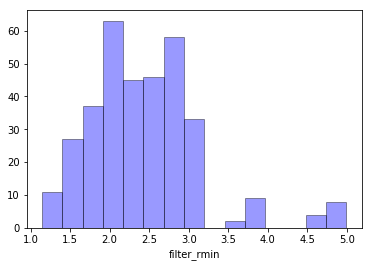

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df.filter_rmin, hist=True, kde=False, 
             bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [53]:
min(df.filter_rmin)

1.1439721982009186

In [58]:
4.8/2

2.4

In [59]:
df[['filter_rmin', 'mesh_independency_filter', 'design_reference', 'load_orientations', 'load_nodes']][105:130]

,filter_rmin,mesh_independency_filter,design_reference,load_orientations,load_nodes
105,1.869867,0.0,2020-01-31 13_26_49_970__1,"[389.61340180670584, 255.54109300093057, 192.5...","[10147, 9696, 9595, 10123, 10112]"
106,2.026167,1.0,2020-01-31 13_29_17_949__1,"[150.83297533087077, 383.6261959759498, 67.032...","[70, 61, 62, 1110, 2019]"
107,3.772352,0.0,2020-01-31 13_29_26_242__1,[82.90636087614764],[10150]
108,1.824452,0.0,2020-01-31 13_31_11_130__1,[144.63201033761837],[9595]
109,2.049866,0.0,2020-01-31 13_34_32_250__1,"[179.5130041735012, 152.57902943558665]","[201, 6160]"
110,2.189321,1.0,2020-01-31 13_37_23_721__1,"[279.8105553300908, 76.65994211811908]","[2727, 2424]"
111,3.772352,0.0,2020-01-31 13_40_21_764__1,[82.90636087614764],[10142]
112,1.824452,0.0,2020-01-31 13_42_18_755__1,[144.63201033761837],[808]
113,3.772352,0.0,2020-01-31 13_42_59_783__1,[82.90636087614764],[8282]
114,2.881965,1.0,2020-01-31 13_45_19_424__1,"[380.7885767615295, 168.0061904453832]","[9292, 2222]"


In [64]:
df[df.design_reference == '2020-01-31 14_22_23_056__1']

,nx,ny,volume_fraction,filter_rmin,initial_penalty,med_penalty,mesh_independency_filter,poisson_ratio_nu,number_of_nodes,Young_modulus_Emin,Young_modulus_Emax,load_nodes,load_orientations,load_intensities,fixed_nodes,type_fixed_nodes,final_objective_function_value,all_objective_function_values,design_reference,time_for_convergence
129,100,100,0.26667,2.026167,3.0,3.0,1.0,0.3,20402,1.000000e-09,1.0,"[8786, 1413, 7574, 9190, 5958]","[150.83297533087077, 383.6261959759498, 67.032...","[1.0, 1.0, 1.0, 1.0, 1.0]","[5050, 4949, 4848, 4747, 4646, 4545, 4444, 434...",,309.88961,"[4757.4996723659515, 2099.8659495087713, 1577....",2020-01-31 14_22_23_056__1,3184.173023


In [61]:
ls 

 Le volume dans le lecteur C s'appelle OSDisk
 Le num‚ro de s‚rie du volume est C42C-110A

 R‚pertoire de C:\Users\walmasri\Documents\ThŠse Cifre\Optimisation_Topologique\TOP_OPT\sample_data\sample_data

03/02/2020  09:50    <DIR>          .
03/02/2020  09:50    <DIR>          ..
03/02/2020  09:48             2ÿ109 design_2020-01-30 12_33_08_077__1.png
03/02/2020  09:48             2ÿ991 design_2020-01-30 12_33_28_940__1.png
03/02/2020  09:48             4ÿ742 design_2020-01-30 12_33_35_487__1.png
03/02/2020  09:48             2ÿ191 design_2020-01-30 12_33_46_348__1.png
03/02/2020  09:48             3ÿ257 design_2020-01-30 12_44_17_796__1.png
03/02/2020  09:48             2ÿ565 design_2020-01-30 12_44_46_839__1.png
03/02/2020  09:48             1ÿ684 design_2020-01-30 12_44_49_303__1.png
03/02/2020  09:48             5ÿ479 design_2020-01-30 12_44_58_702__1.png
03/02/2020  09:48             1ÿ370 design_2020-01-30 12_45_20_035__1.png
03/02/2020  09:48             3ÿ629 design_2020-01-30

In [62]:
import cv2
img = cv2.imread('./design_2020-01-30 12_33_08_077__1.png')

In [1]:
pwd

'C:\\Users\\walmasri\\Documents\\Thèse Cifre\\Optimisation_Topologique\\TOP_OPT'

In [3]:
import pandas as pd
df = pd.read_excel('./sample_data/parameters/design_parameters_until_220-02-04.xlsx', 'data')

In [8]:
df.columns

Index(['nx', 'ny', 'volume_fraction', 'filter_rmin', 'initial_penalty',
       'med_penalty', 'mesh_independency_filter', 'poisson_ratio_nu',
       'number_of_nodes', 'Young_modulus_Emin', 'Young_modulus_Emax',
       'load_nodes', 'load_orientations', 'load_intensities', 'fixed_nodes',
       'type_fixed_nodes', 'final_objective_function_value',
       'all_objective_function_values', 'design_reference',
       'time_for_convergence'],
      dtype='object')

In [6]:
import numpy as np
nx = 100
ny = 100
possible_fixed_nodes = np.arange(0, ny+1).tolist()+ [m*(ny +1)-1 for m in range(2,nx+1)] + np.sort(np.arange((ny+1)*nx, (nx+1)*(ny+1))).tolist()[::-1] + np.sort(np.asarray([m*(ny+1) for m in range(1,nx)])).tolist()[::-1]  

In [15]:
# df.fixed_nodes[0].replace('[', '').replace(']', '').split(', ')

In [17]:

# d1 is the distance between node0 and the 1st fixed node
# d1 = index of 1st fixed node in the possible_fixed_nodes list / perimeter of the volume such that the perimeter of the volume = 2*(nx+ny) = len(possible_fixed_nodes)
df['d1'] = [ possible_fixed_nodes.index(int(f.replace('[', '').replace(']', '').split(', ')[0]))/len(possible_fixed_nodes) for f in df.fixed_nodes ]
# d2 is the distance between node0 and the last fixed node
# d2 = index of lasst fixed node in the possible_fixed_nodes list / perimeter of the volume such that the perimeter of the volume = 2*(nx+ny) = len(possible_fixed_nodes)
df['d2'] = [possible_fixed_nodes.index(int(f.replace('[', '').replace(']', '').split(', ')[-1]))/len(possible_fixed_nodes) for f in df.fixed_nodes]
# d3 is the distance between node0 and the load node
# NB: a load node here is an edge node
# d3 = index of load node in the possible_fixed_nodes list / perimeter of the volume such that the perimeter of the volume = 2*(nx+ny) = len(possible_fixed_nodes)
# Since there could be N load nodes, d3 is a list of distances
df['d3'] = [[possible_fixed_nodes.index(int(l0))/len(possible_fixed_nodes) for l0 in l.replace('[', '').replace(']', '').split(', ')] for l in df.load_nodes]
# d1, d2 and d3 are now borned parameters => GAN can easily learn to recreate them

In [19]:
df.head()[['fixed_nodes', 'load_nodes', 'd1', 'd2', 'd3']]

,fixed_nodes,load_nodes,d1,d2,d3
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[10198, 7170, 9897, 8281]",0.000,0.1100,"[0.505, 0.425, 0.4925, 0.4525]"
1,"[5050, 4949, 4848, 4747, 4646, 4545, 4444, 434...",[605],0.875,0.9975,[0.2625]
2,"[5050, 4949, 4848, 4747, 4646, 4545, 4444, 434...","[6160, 8483, 1817, 7675]",0.875,0.9925,"[0.4, 0.4575, 0.2925, 0.4375]"
3,"[100, 201, 302, 403, 504, 605, 706, 807, 908, ...",[10146],0.250,0.3650,[0.635]
4,"[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...","[10152, 10146]",0.125,0.2650,"[0.62, 0.635]"


In [21]:
possible_fixed_nodes.index(10198)/len(possible_fixed_nodes)

0.505

In [22]:
df.to_excel('./sample_data/parameters/design_parameters_until_220-02-04_v2.0.xlsx', 'data')